In [1]:
import requests, six
import lxml.html as lh
from itertools import cycle, islice
from matplotlib import colors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [5]:
#import bs4 as bs
#import urllib.request

In [2]:
dfs2 = pd.read_html('https://www.epa.gov/facts-and-figures-about-materials-waste-and-recycling/national-overview-facts-and-figures-materials',header = 0)
for df2 in dfs2:
    print(df2)
    
df2 = pd.DataFrame(df2)
df2

                          Material Recycled Composted  \
0           Paper and paperboard**    45.32         -   
1                            Glass     3.03         -   
2                            Steel     6.06         -   
3                         Aluminum     0.67         -   
4         Other nonferrous metals†      1.5         -   
5                     Total metals     8.23         -   
6                         Plastics     3.14         -   
7              Rubber and Leather‡     1.51         -   
8                         Textiles     2.45         -   
9                             Wood     2.66         -   
10                    Food, Other^        -       2.1   
11                  Yard trimmings        -     21.29   
12  Miscellaneous Inorganic Wastes        -         -   
13                          Totals    66.34     23.39   

    Combustion with Energy Recovery  Landfilled GHG Benefits (MMTCO2E)  \
0                              4.45       18.27               (152.55)

,Material,Recycled,Composted,Combustion with Energy Recovery,Landfilled,GHG Benefits (MMTCO2E),Passenger Vehicle Emissions/Year (millions of cars)
0,Paper and paperboard**,45.32,-,4.45,18.27,(152.55),(32.67)
1,Glass,3.03,-,1.47,6.97,(0.89),(0.19)
2,Steel,6.06,-,2.14,9.97,(14.51),(3.11)
3,Aluminum,0.67,-,0.50,2.44,(6.11),(1.31)
4,Other nonferrous metals†,1.5,-,0.06,0.66,(6.6),(1.41)
5,Total metals,8.23,-,2.70,13.07,(27.23),(5.83)
6,Plastics,3.14,-,5.35,26.01,3.14,0.67
7,Rubber and Leather‡,1.51,-,1.78,0.46,(0.38),(0.08)
8,Textiles,2.45,-,3.05,10.53,5.29,1.13
9,Wood,2.66,-,2.58,11.06,(2.81),(0.6)


In [4]:
#rename columns
df2.rename(columns = {'GHG Benefits (MMTCO2E)':'GHG Benefits MMTCO2E'}, inplace = True)
df2.rename(columns = {'Passenger Vehicle Emissions/Year (millions of cars)':'Passenger Vehicle Emissions Year'}, inplace = True)

In [5]:
print(df2.dtypes)

Material                             object
Recycled                             object
Composted                            object
Combustion with Energy Recovery     float64
Landfilled                          float64
GHG Benefits MMTCO2E                 object
Passenger Vehicle Emissions Year     object
dtype: object


In [5]:
df2 = df2.replace('-',0)
df2

,Material,Recycled,Composted,Combustion with Energy Recovery,Landfilled,GHG Benefits MMTCO2E,Passenger Vehicle Emissions Year
0,Paper and paperboard**,45.32,0,4.45,18.27,(152.55),(32.67)
1,Glass,3.03,0,1.47,6.97,(0.89),(0.19)
2,Steel,6.06,0,2.14,9.97,(14.51),(3.11)
3,Aluminum,0.67,0,0.50,2.44,(6.11),(1.31)
4,Other nonferrous metals†,1.5,0,0.06,0.66,(6.6),(1.41)
5,Total metals,8.23,0,2.70,13.07,(27.23),(5.83)
6,Plastics,3.14,0,5.35,26.01,3.14,0.67
7,Rubber and Leather‡,1.51,0,1.78,0.46,(0.38),(0.08)
8,Textiles,2.45,0,3.05,10.53,5.29,1.13
9,Wood,2.66,0,2.58,11.06,(2.81),(0.6)


In [6]:
df2['Recycled'] = df2.Recycled.astype(float)
df2['Composted'] = df2.Composted.astype(float)
df2['GHG Benefits MMTCO2E'] = df2['GHG Benefits MMTCO2E'].replace('[)]','', regex = True)
df2['GHG Benefits MMTCO2E'] = df2['GHG Benefits MMTCO2E'].replace('[(]','-', regex = True).astype(float)
df2['Passenger Vehicle Emissions Year'] = df2['Passenger Vehicle Emissions Year'].replace('[)]','', regex = True)
df2['Passenger Vehicle Emissions Year'] = df2['Passenger Vehicle Emissions Year'].replace('[(]','-', regex = True).astype(float)

In [8]:
print(df2.dtypes)

Material                             object
Recycled                            float64
Composted                           float64
Combustion with Energy Recovery     float64
Landfilled                          float64
GHG Benefits MMTCO2E                float64
Passenger Vehicle Emissions Year    float64
dtype: object


In [7]:
stats = df2[['Recycled', 'Composted', 'Combustion with Energy Recovery', 'Landfilled', 'GHG Benefits MMTCO2E', 'Passenger Vehicle Emissions Year']]
stats = df2.drop(df2.index[-1])
stats.corr()

,Recycled,Composted,Combustion with Energy Recovery,Landfilled,GHG Benefits MMTCO2E,Passenger Vehicle Emissions Year
Recycled,1.000000,-0.156535,0.253362,0.247707,-0.988698,-0.988724
Composted,-0.156535,1.000000,0.060533,0.053550,0.127640,0.127760
Combustion with Energy Recovery,0.253362,0.060533,1.000000,0.964674,-0.242876,-0.242823
Landfilled,0.247707,0.053550,0.964674,1.000000,-0.235112,-0.235076
GHG Benefits MMTCO2E,-0.988698,0.127640,-0.242876,-0.235112,1.000000,1.000000
Passenger Vehicle Emissions Year,-0.988724,0.127760,-0.242823,-0.235076,1.000000,1.000000


In [8]:
from pandas.plotting import scatter_matrix


In [9]:
plt.style.use('default')

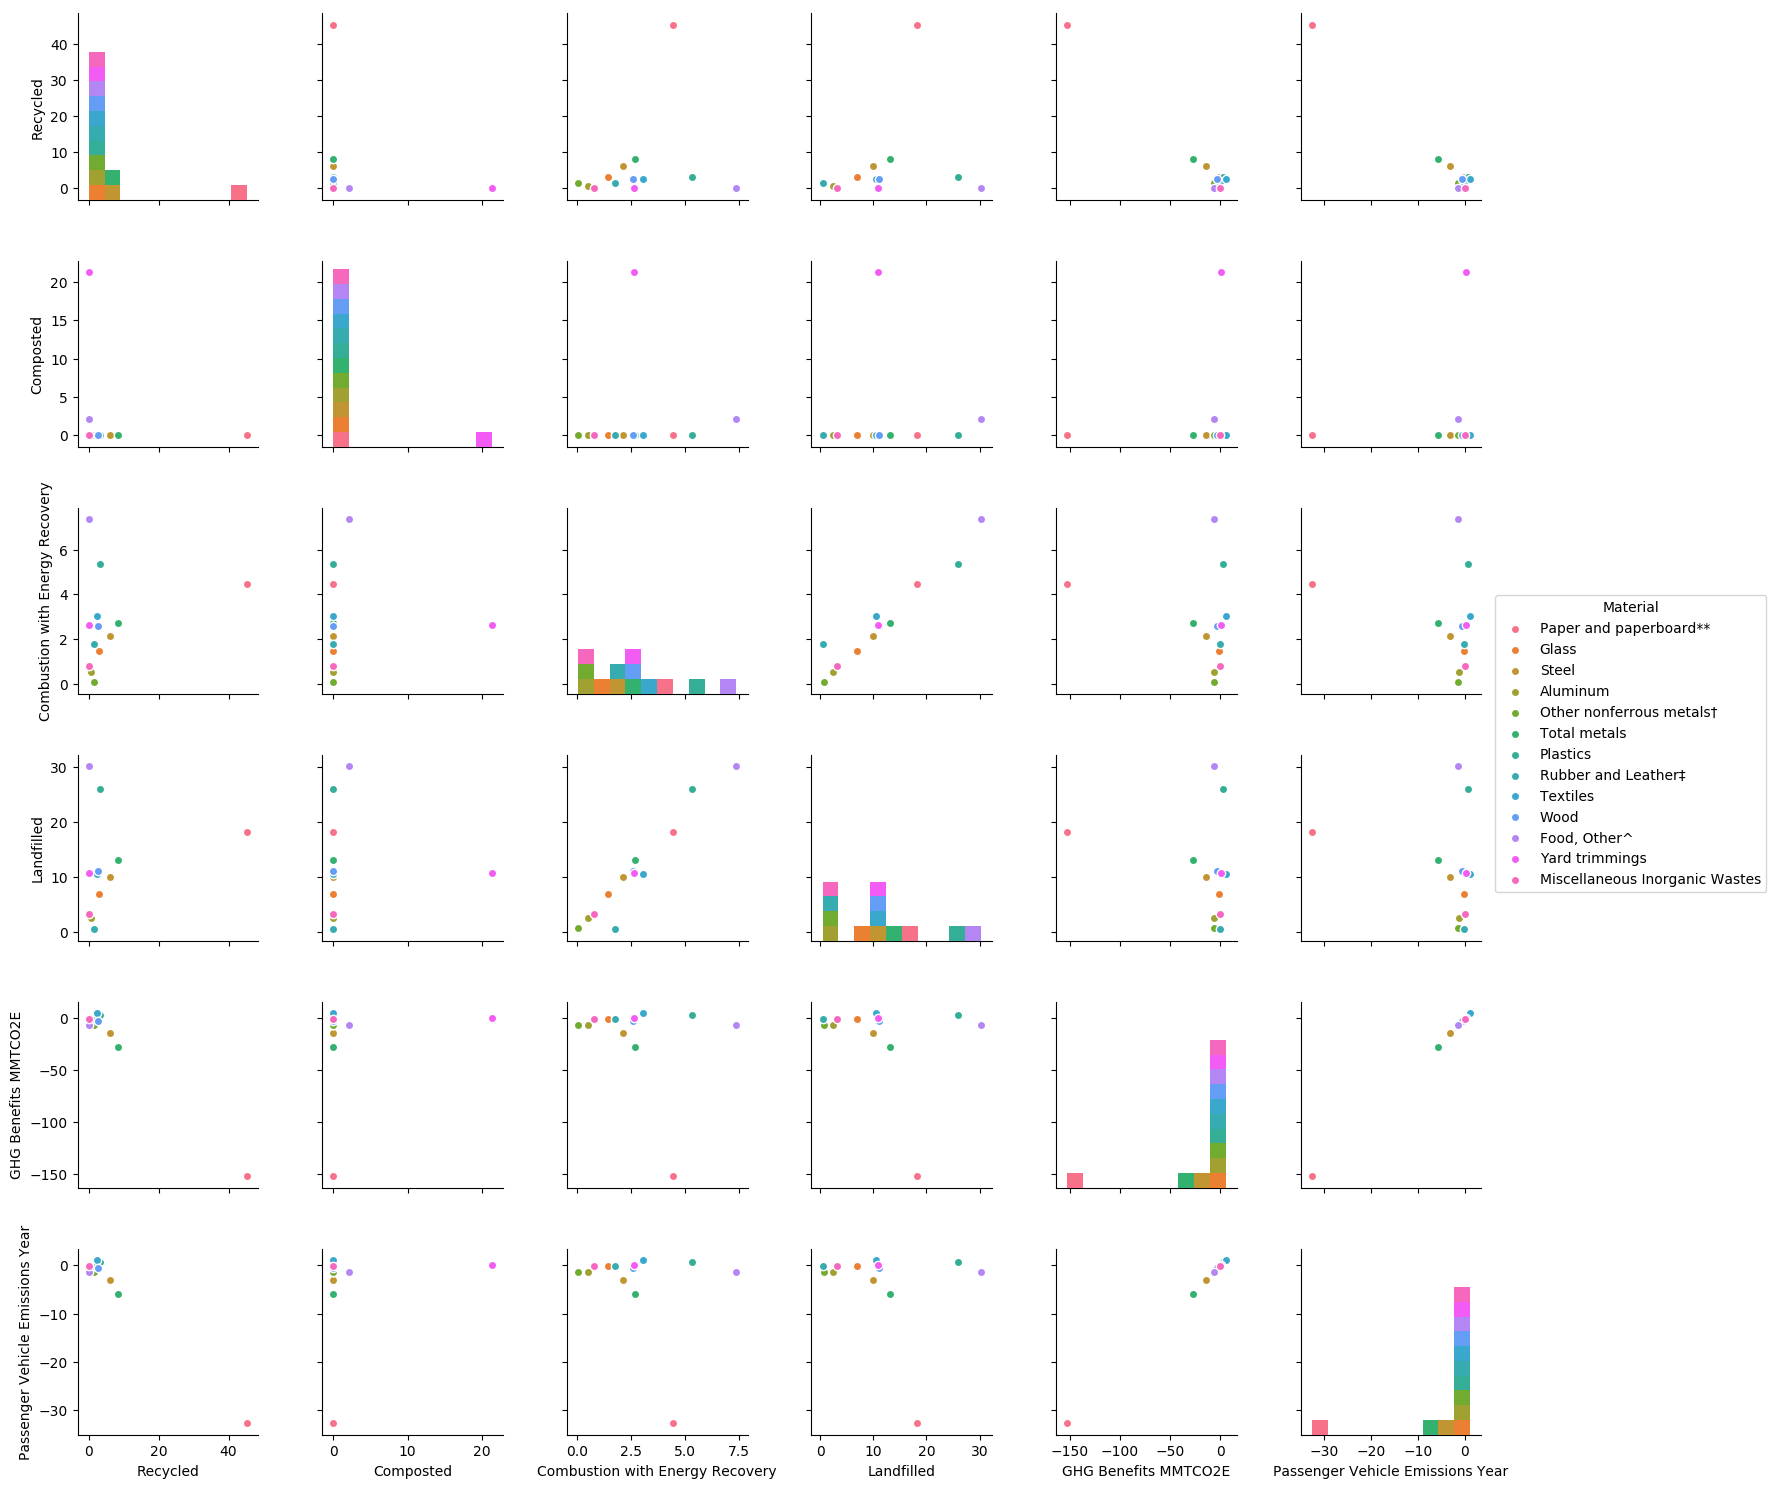

In [10]:
scatterplot = sns.pairplot(df2.drop(df2.index[-1]), hue = 'Material')
scatterplot

In [472]:
scatterplot.savefig("scatter_next.jpg")


In [12]:
# excluded 'composted'
df3 = df2[['Material', 'Recycled', 'Combustion with Energy Recovery', 'Landfilled', 'GHG Benefits MMTCO2E', 'Passenger Vehicle Emissions Year']]


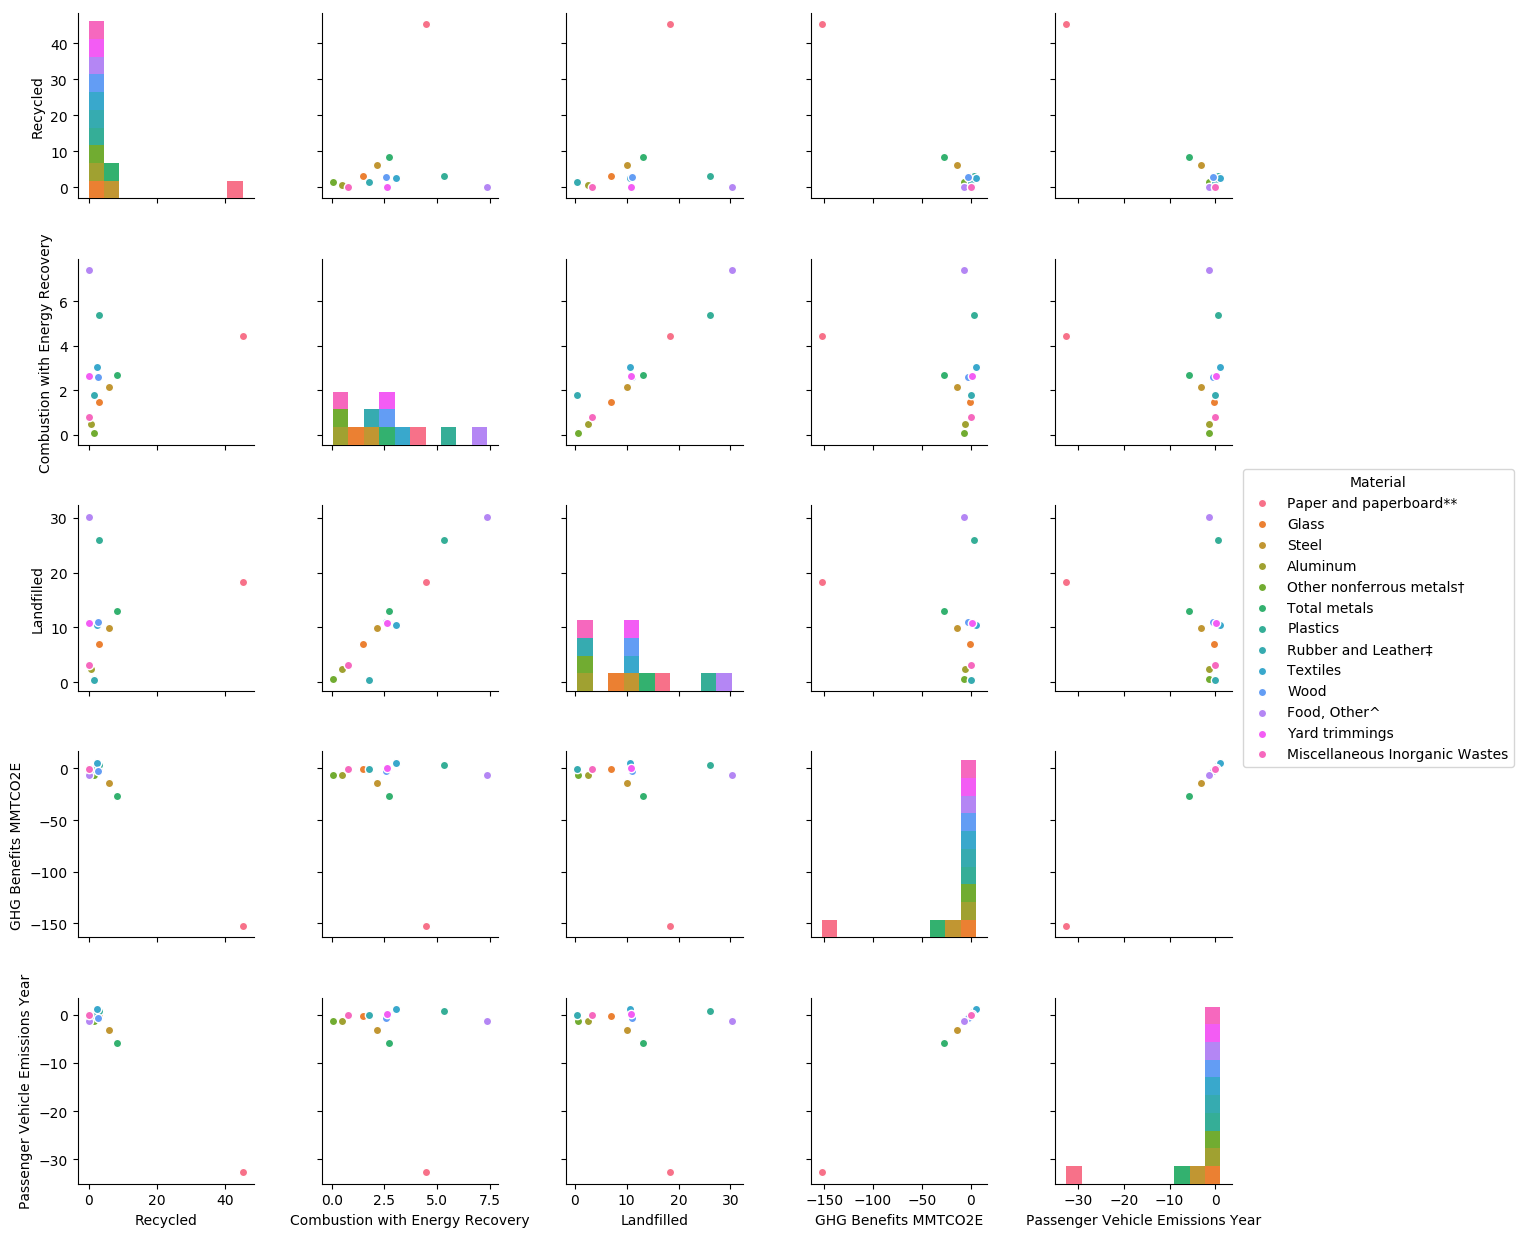

In [13]:
scatterplot2 = sns.pairplot(df3.drop(df3.index[-1]), hue = 'Material')
scatterplot2

In [307]:
scatterplot2.savefig("scatter_next2.jpg")

In [14]:
df_test = df2.set_index('Material').T
df_test

Material,Paper and paperboard**,Glass,Steel,Aluminum,Other nonferrous metals†,Total metals,Plastics,Rubber and Leather‡,Textiles,Wood,"Food, Other^",Yard trimmings,Miscellaneous Inorganic Wastes,Totals
Recycled,45.32,3.03,6.06,0.67,1.50,8.23,3.14,1.51,2.45,2.66,0.00,0.00,0.00,66.34
Composted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.10,21.29,0.00,23.39
Combustion with Energy Recovery,4.45,1.47,2.14,0.50,0.06,2.70,5.35,1.78,3.05,2.58,7.38,2.63,0.78,32.17
Landfilled,18.27,6.97,9.97,2.44,0.66,13.07,26.01,0.46,10.53,11.06,30.25,10.80,3.21,130.63
GHG Benefits MMTCO2E,-152.55,-0.89,-14.51,-6.11,-6.60,-27.23,3.14,-0.38,5.29,-2.81,-6.56,0.73,-0.32,-181.58
Passenger Vehicle Emissions Year,-32.67,-0.19,-3.11,-1.31,-1.41,-5.83,0.67,-0.08,1.13,-0.60,-1.40,0.16,-0.07,-38.81


In [15]:
for col in df_test.columns:
    print(col)

Paper and paperboard**
Glass
Steel
Aluminum
Other nonferrous metals†
Total metals
Plastics
Rubber and Leather‡
Textiles
Wood
Food, Other^
Yard trimmings
Miscellaneous Inorganic Wastes
Totals


In [16]:
df_test2 = df_test.iloc[0:4,0:13]
df_test2
df_test2.columns = ['Paper','Glass','Steel','Aluminum','Other Metals','Total Metals','Plastics','Rubber','Textiles','Wood','Food','Yard Trims','Misc Inorganic']
df_test2
df_test3 = df_test2.loc[:,['Paper','Glass','Total Metals','Plastics','Rubber','Textiles','Wood','Food','Yard Trims','Misc Inorganic']]
df_test3

,Paper,Glass,Total Metals,Plastics,Rubber,Textiles,Wood,Food,Yard Trims,Misc Inorganic
Recycled,45.32,3.03,8.23,3.14,1.51,2.45,2.66,0.00,0.00,0.00
Composted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.10,21.29,0.00
Combustion with Energy Recovery,4.45,1.47,2.70,5.35,1.78,3.05,2.58,7.38,2.63,0.78
Landfilled,18.27,6.97,13.07,26.01,0.46,10.53,11.06,30.25,10.80,3.21


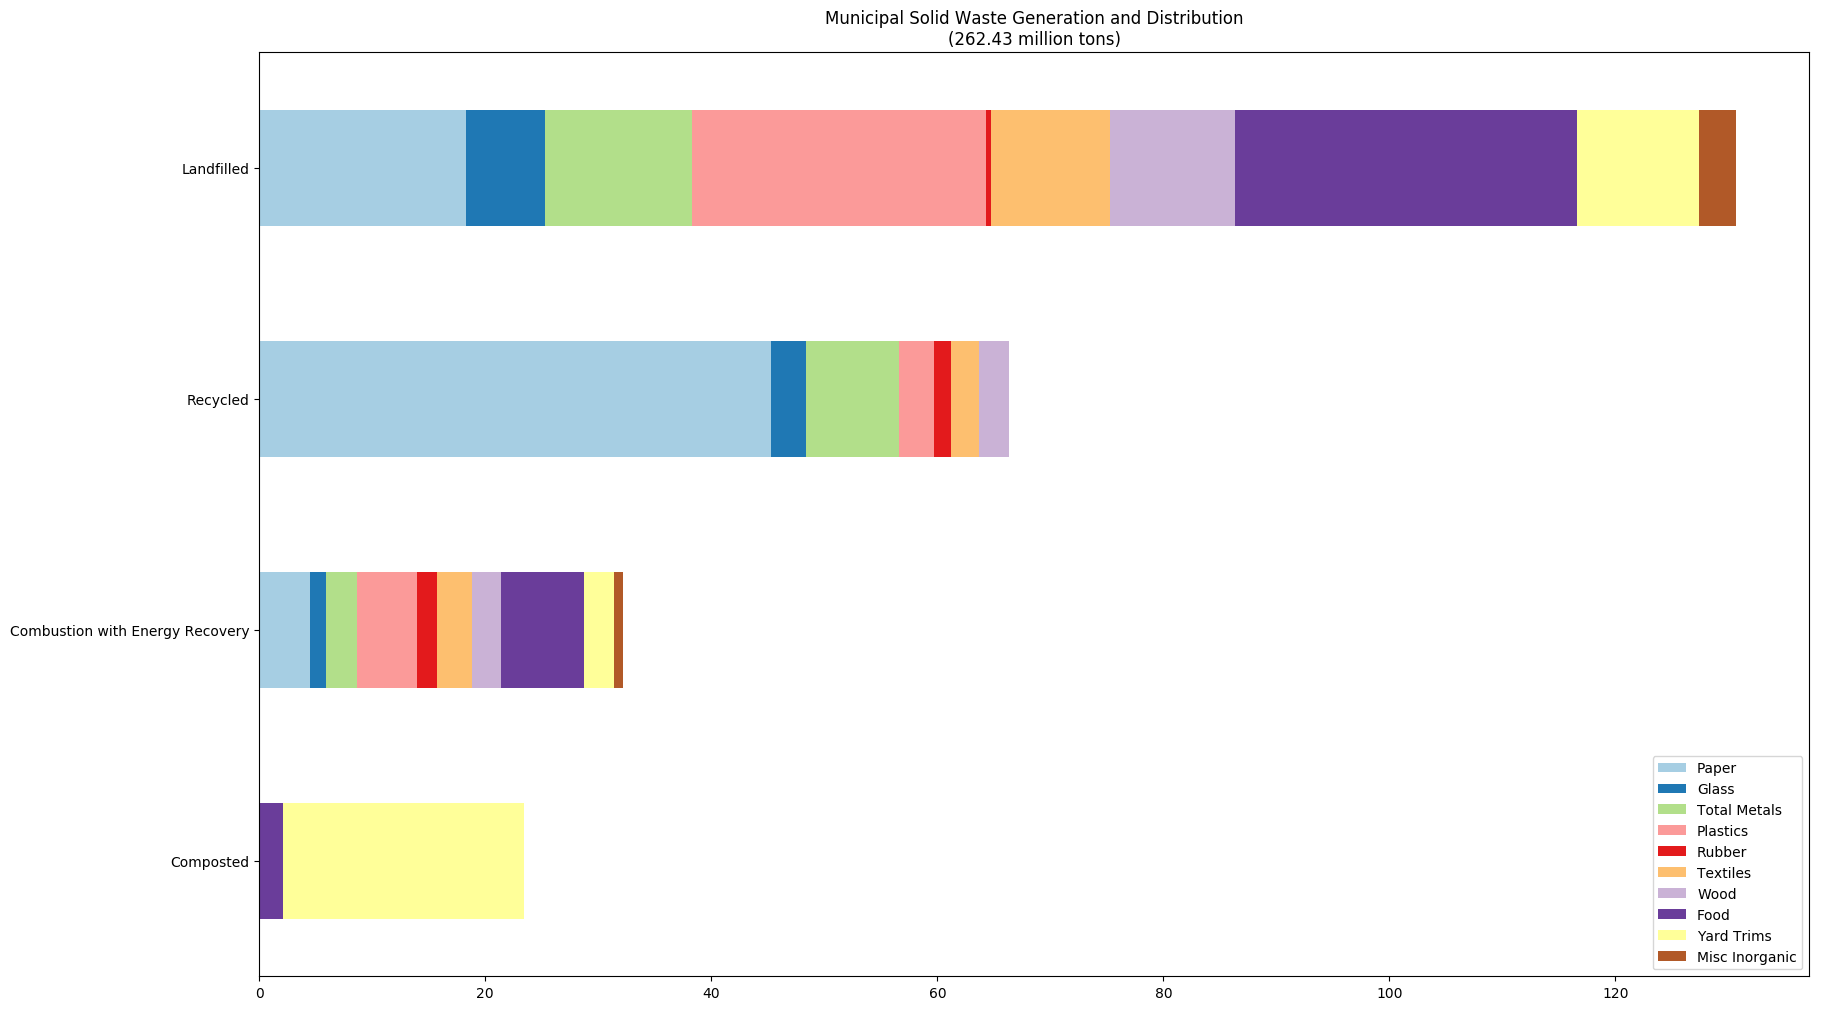

In [17]:
#df_test3.plot.bar(stacked = True, figsize = (10,7))
plt.style.use('default')
barplot = df_test3.loc[['Composted','Combustion with Energy Recovery','Recycled','Landfilled'],:].plot.barh(stacked = True, colormap ='Paired', figsize = (20,12))
#barplot = df_test3.plot.barh(stacked = True, colormap ='Paired', figsize = (16,12))
barplot = plt.title("Municipal Solid Waste Generation and Distribution\n(262.43 million tons)")
barplot
#barplot2 = plt.rcParams['axes.facecolor'] = 'white'
#barplot2

In [379]:
barplot.figure.savefig("barplot.jpg")


In [18]:
df_test4 = df_test.iloc[4:6,0:13]
df_test4
df_test4.columns = ['Paper','Glass','Steel','Aluminum','Other Metals','Total Metals','Plastics','Rubber','Textiles','Wood','Food','Yard Trims','Misc Inorganic']
df_test4
df_test5 = df_test4.loc[:,['Paper','Glass','Total Metals','Plastics','Rubber','Textiles','Wood','Food','Yard Trims','Misc Inorganic']]
df_test5

,Paper,Glass,Total Metals,Plastics,Rubber,Textiles,Wood,Food,Yard Trims,Misc Inorganic
GHG Benefits MMTCO2E,-152.55,-0.89,-27.23,3.14,-0.38,5.29,-2.81,-6.56,0.73,-0.32
Passenger Vehicle Emissions Year,-32.67,-0.19,-5.83,0.67,-0.08,1.13,-0.60,-1.40,0.16,-0.07


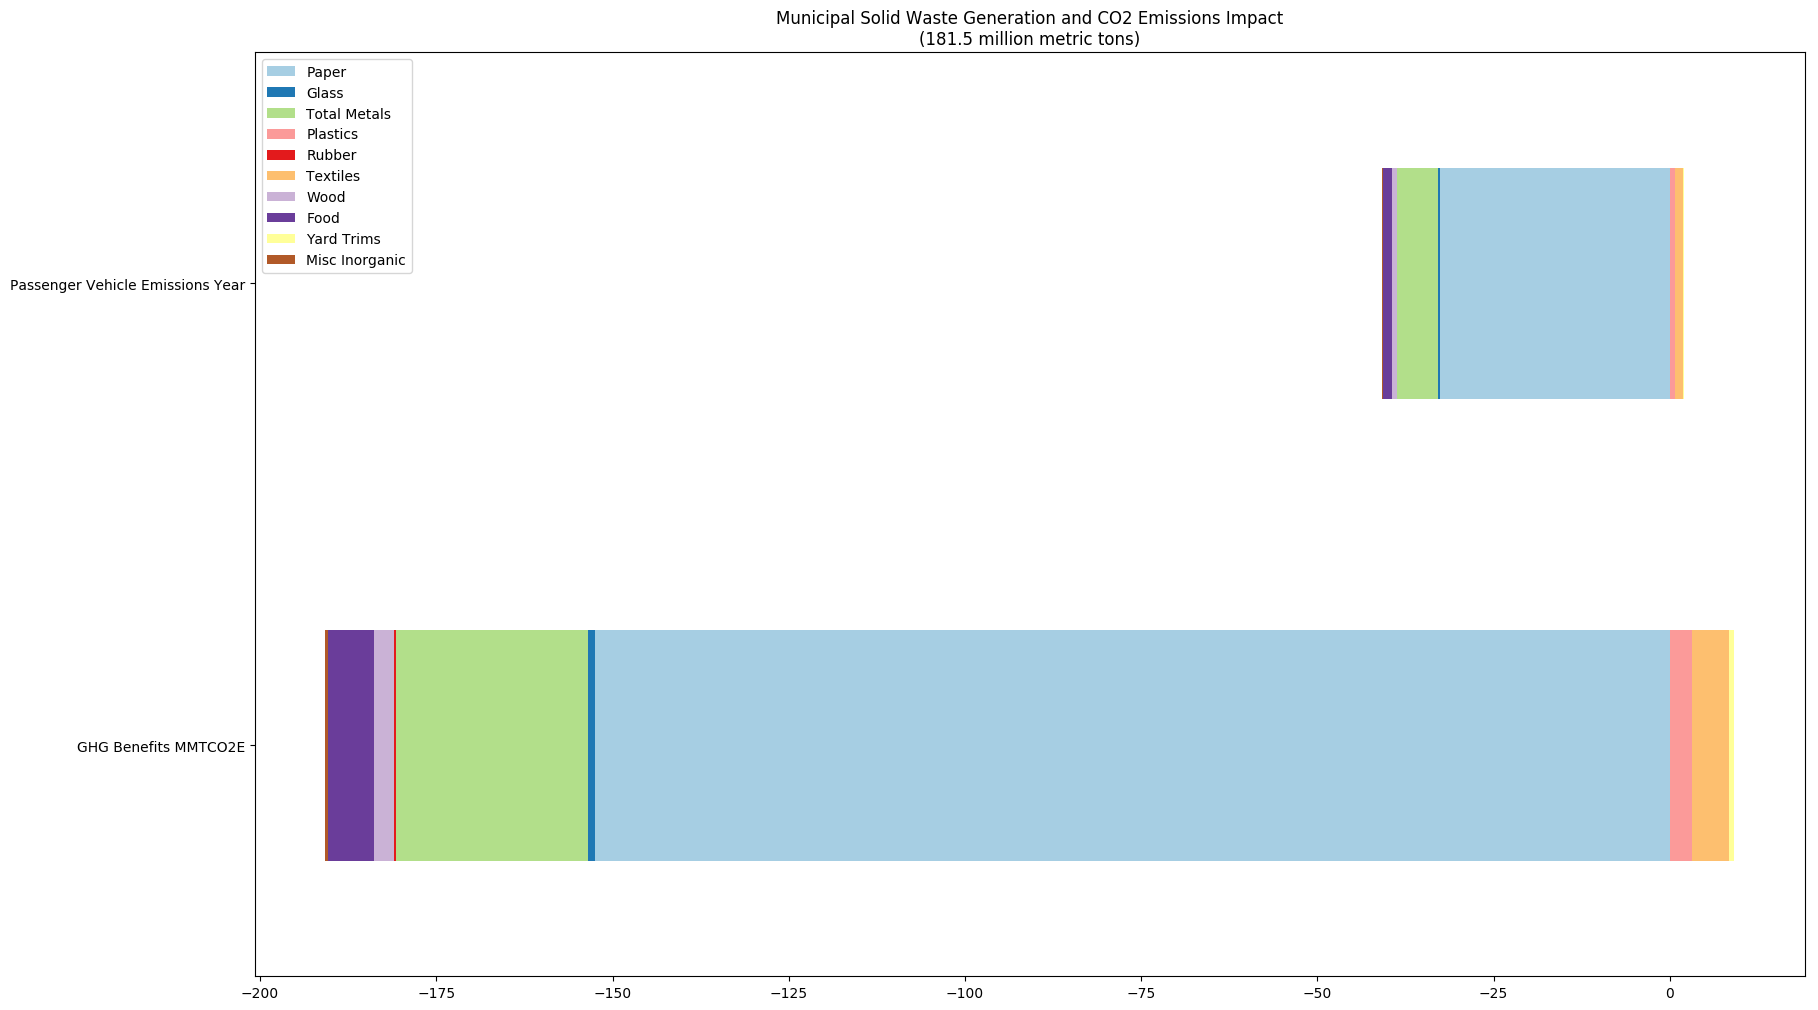

In [19]:
barplot2 = df_test5.plot.barh(stacked = True, colormap ='Paired', figsize = (20,12))
barplot2 = plt.title("Municipal Solid Waste Generation and CO2 Emissions Impact\n(181.5 million metric tons)")

barplot2

In [476]:
barplot2.figure.savefig("barplot_2.jpg")

In [20]:
# scrape plastics table html
dfs = pd.read_html('https://www.epa.gov/facts-and-figures-about-materials-waste-and-recycling/plastics-material-specific-data',header = 0)
for df in dfs:
    print(df)
    
df = pd.DataFrame(df)
df

                Management Pathway 1960  1970  1980   1990   2000   2005  \
0                       Generation  390  2900  6830  17130  25550  29380   
1                         Recycled    -     -    20    370   1480   1780   
2                        Composted    -     -     -      -      -      -   
3  Combustion with Energy Recovery    -     -   140   2980   4120   4330   
4                       Landfilled  390  2900  6670  13780  19950  23270   

    2010   2014   2015  
0  31400  33390  34500  
1   2500   3190   3140  
2      -      -      -  
3   4530   5010   5350  
4  24370  25190  26010  


,Management Pathway,1960,1970,1980,1990,2000,2005,2010,2014,2015
0,Generation,390,2900,6830,17130,25550,29380,31400,33390,34500
1,Recycled,-,-,20,370,1480,1780,2500,3190,3140
2,Composted,-,-,-,-,-,-,-,-,-
3,Combustion with Energy Recovery,-,-,140,2980,4120,4330,4530,5010,5350
4,Landfilled,390,2900,6670,13780,19950,23270,24370,25190,26010


In [21]:
df = df.replace('-',0)
df

,Management Pathway,1960,1970,1980,1990,2000,2005,2010,2014,2015
0,Generation,390,2900,6830,17130,25550,29380,31400,33390,34500
1,Recycled,0,0,20,370,1480,1780,2500,3190,3140
2,Composted,0,0,0,0,0,0,0,0,0
3,Combustion with Energy Recovery,0,0,140,2980,4120,4330,4530,5010,5350
4,Landfilled,390,2900,6670,13780,19950,23270,24370,25190,26010


In [22]:
print(df.dtypes)

Management Pathway    object
1960                  object
1970                  object
1980                  object
1990                  object
2000                  object
2005                  object
2010                  object
2014                  object
2015                  object
dtype: object


In [23]:
df['1960'] = df['1960'].astype(int)
df['1970'] = df['1970'].astype(int)
df['1980'] = df['1980'].astype(int)
df['1990'] = df['1990'].astype(int)
df['2000'] = df['2000'].astype(int)
df['2005'] = df['2005'].astype(int)
df['2010'] = df['2010'].astype(int)
df['2014'] = df['2014'].astype(int)
df['2015'] = df['2015'].astype(int)

In [24]:
print(df.dtypes)

Management Pathway    object
1960                   int32
1970                   int32
1980                   int32
1990                   int32
2000                   int32
2005                   int32
2010                   int32
2014                   int32
2015                   int32
dtype: object


In [25]:
df

,Management Pathway,1960,1970,1980,1990,2000,2005,2010,2014,2015
0,Generation,390,2900,6830,17130,25550,29380,31400,33390,34500
1,Recycled,0,0,20,370,1480,1780,2500,3190,3140
2,Composted,0,0,0,0,0,0,0,0,0
3,Combustion with Energy Recovery,0,0,140,2980,4120,4330,4530,5010,5350
4,Landfilled,390,2900,6670,13780,19950,23270,24370,25190,26010


In [26]:
df_T = df.set_index('Management Pathway').T
df_T
df_T['index1'] = df_T.index
df_T

Management Pathway,Generation,Recycled,Composted,Combustion with Energy Recovery,Landfilled,index1
1960,390,0,0,0,390,1960
1970,2900,0,0,0,2900,1970
1980,6830,20,0,140,6670,1980
1990,17130,370,0,2980,13780,1990
2000,25550,1480,0,4120,19950,2000
2005,29380,1780,0,4330,23270,2005
2010,31400,2500,0,4530,24370,2010
2014,33390,3190,0,5010,25190,2014
2015,34500,3140,0,5350,26010,2015


In [27]:
print(df_T.dtypes)

Management Pathway
Generation                          int32
Recycled                            int32
Composted                           int32
Combustion with Energy Recovery     int32
Landfilled                          int32
index1                             object
dtype: object


In [28]:
df_T['index1'] = df_T['index1'].astype(int)

In [29]:
year = df_T.index1.values
year

array([1960, 1970, 1980, 1990, 2000, 2005, 2010, 2014, 2015])

In [30]:
gen = df_T.Generation.values
gen

array([  390,  2900,  6830, 17130, 25550, 29380, 31400, 33390, 34500])

In [31]:
rec = df_T.Recycled.values
rec

array([   0,    0,   20,  370, 1480, 1780, 2500, 3190, 3140])

In [32]:
comp = df_T.Composted.values
comp

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
comb = df_T['Combustion with Energy Recovery'].values
comb

array([   0,    0,  140, 2980, 4120, 4330, 4530, 5010, 5350])

In [34]:
land = df_T.Landfilled.values
land

array([  390,  2900,  6670, 13780, 19950, 23270, 24370, 25190, 26010])

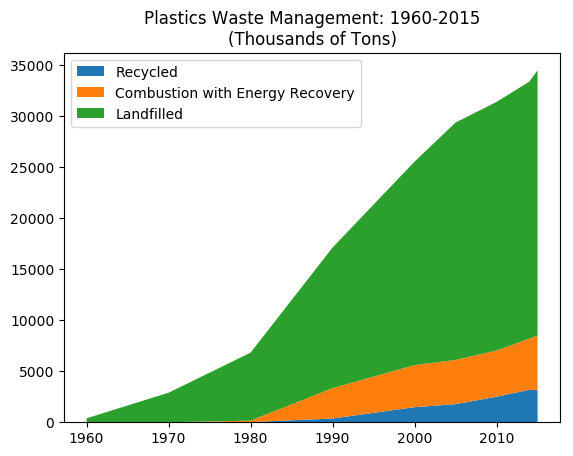

In [35]:
stackplot = plt.gcf()
stackplot = plt.stackplot(year, rec, comb, land)
stackplot = plt.legend(['Recycled','Combustion with Energy Recovery','Landfilled'], loc = 2)
stackplot = plt.title('Plastics Waste Management: 1960-2015\n(Thousands of Tons)')
stackplot = plt.figure(figsize=(20,10))

In [470]:
stackplot.savefig('stackplot.jpg')
plt.show()

Management Pathway,Recycled,Composted,Combustion with Energy Recovery,Landfilled
1960,0,0,0,390
1970,0,0,0,2900
1980,20,0,140,6670
1990,370,0,2980,13780
2000,1480,0,4120,19950
2005,1780,0,4330,23270
2010,2500,0,4530,24370
2014,3190,0,5010,25190
2015,3140,0,5350,26010


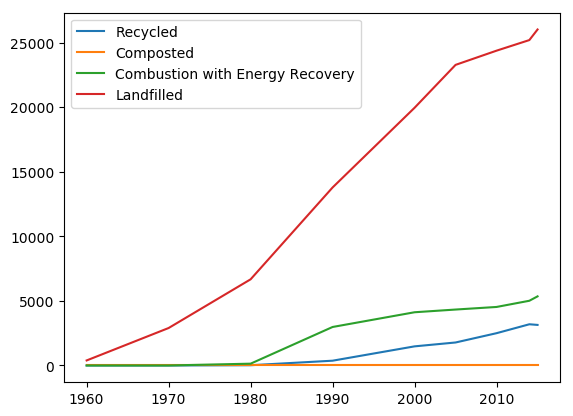

In [36]:
df_T2 = df_T[['Recycled', 'Composted', 'Combustion with Energy Recovery', 'Landfilled']]
lineplot = plt.plot(df_T2)
lineplot = plt.legend(['Recycled','Composted','Combustion with Energy Recovery','Landfilled'], loc = 2)
df_T2

In [6]:
#source = urllib.request.urlopen('https://www.epa.gov/facts-and-figures-about-materials-waste-and-recycling/plastics-material-specific-data').read()
#soup = bs.BeautifulSoup(source, 'lxml')

In [7]:
#table = soup.find('table')

In [8]:
#table_rows = table.find_all('tr')

In [12]:
#for tr in table_rows:
    #td = tr.find_all('td')
    #row = [i.text for i in td]
    #print(row)

[]
['Generation', '390', '2,900', '6,830', '17,130', '25,550', '29,380', '31,400', '33,390', '34,500']
['Recycled', '-', '-', '20', '370', '1,480', '1,780', '2,500', '3,190', '3,140']
['Composted', '-', '-', '-', '-', '-', '-', '-', '-', '-']
['Combustion with Energy Recovery', '-', '-', '140', '2,980', '4,120', '4,330', '4,530', '5,010', '5,350']
['Landfilled', '390', '2,900', '6,670', '13,780', '19,950', '23,270', '24,370', '25,190', '26,010']
